In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('trainanshu.csv')

In [3]:
df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [4]:
# sns.pairplot(df)

In [5]:
df.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [6]:
df.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.006145,-0.003449,0.004302,-0.019656,-0.010224,-0.004745,0.000123,0.008443,0.011733
Market_Category,-0.006145,1.000000,-0.036346,-0.018800,-0.003306,0.019009,0.024154,0.194787,0.134257,0.138711
Grade,-0.003449,-0.036346,1.000000,0.010107,-0.025232,-0.025316,-0.016644,-0.079583,0.164350,0.086450
Demand,0.004302,-0.018800,0.010107,1.000000,0.010230,-0.007370,0.017653,0.010283,0.003987,-0.000601
Discount_avail,-0.019656,-0.003306,-0.025232,0.010230,1.000000,-0.003899,0.018905,0.009817,-0.003918,-0.512457
charges_1,-0.010224,0.019009,-0.025316,-0.007370,-0.003899,1.000000,0.270625,0.019448,0.012169,0.053045
charges_2 (%),-0.004745,0.024154,-0.016644,0.017653,0.018905,0.270625,1.000000,0.005448,0.009816,0.009031
Minimum_price,0.000123,0.194787,-0.079583,0.010283,0.009817,0.019448,0.005448,1.000000,0.708038,0.700444
Maximum_price,0.008443,0.134257,0.164350,0.003987,-0.003918,0.012169,0.009816,0.708038,1.000000,0.766928
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000


In [7]:
df=df.drop(['charges_2 (%)','Demand','Stall_no','Product_id','Customer_name'],axis=1)

In [8]:
df.head()

,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Discount_avail,Minimum_price,Maximum_price,Selling_Price
0,2015-08-22 18:36:12.000,2,Yes,Fashion,1,0.0,2983.0,4713.0,4185.947700
1,2016-03-27 21:19:13.000,24,Yes,Fashion,0,0.0,7495.0,10352.0,9271.490256
2,2015-08-18 19:25:22.000,447,Yes,Child_care,0,0.0,5752.0,7309.0,6785.701362
3,2016-03-28 21:53:01.000,23,Yes,Educational,2,0.0,5090.0,20814.0,13028.917824
4,2016-03-29 22:58:53.000,63,Yes,Repair,1,1.0,2430.0,9261.0,906.553935


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instock_date      6368 non-null   object 
 1   Market_Category   6368 non-null   int64  
 2   Loyalty_customer  6368 non-null   object 
 3   Product_Category  6368 non-null   object 
 4   Grade             6368 non-null   int64  
 5   Discount_avail    6330 non-null   float64
 6   Minimum_price     6330 non-null   float64
 7   Maximum_price     6025 non-null   float64
 8   Selling_Price     6327 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 447.9+ KB


In [10]:
df['Loyalty_customer'].nunique()

2

In [11]:
df['Loyalty_customer']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
6363    Yes
6364    Yes
6365    No 
6366    Yes
6367    Yes
Name: Loyalty_customer, Length: 6368, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
enc = LabelEncoder()
df['Loyalty_customer']=enc.fit_transform(df['Loyalty_customer'])

In [14]:
df['Loyalty_customer'].head()

0    1
1    1
2    1
3    1
4    1
Name: Loyalty_customer, dtype: int32

In [15]:

df['Product_Category']=enc.fit_transform(df['Product_Category'])

In [16]:
df['Product_Category'].nunique()

10

In [17]:
df['Product_Category'].unique()

array([3, 0, 2, 8, 9, 1, 5, 6, 7, 4])

In [18]:
# enc1 = OneHotEncoder(handle_unknown='ignore')
# yencode= [['Fashion', 1], ['Child_care', 2],['Educational', 3], ['Repair', 4],['Technology', 5], ['Cosmetics', 6],
#    ['Hospitality', 7], ['Organic', 8],['Pet_care', 9], ['Home_Decor', 10]]
# df['Product_Category']=enc1.fit(yencode)

In [19]:
df['Product_Category'].describe()

count    6368.000000
mean        4.521200
std         2.891937
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Product_Category, dtype: float64

In [20]:
df=df.drop('instock_date',axis=1)

In [21]:
df.isnull().sum()

Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Discount_avail       38
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [22]:
df['Selling_Price'].describe()

count     6327.000000
mean      4563.242592
std       2979.102408
min      -6062.470000
25%       2450.005280
50%       4210.384640
75%       6167.643252
max      22638.325941
Name: Selling_Price, dtype: float64

C:\Users\91966\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Selling_Price'>

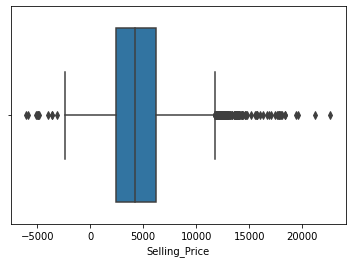

In [23]:
sns.boxplot('Selling_Price',data=df)

In [24]:
df=df[df['Selling_Price']>0]

In [25]:
df['Selling_Price'].min()

36.0

In [26]:
df.isnull().sum()

Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Discount_avail       37
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

C:\Users\91966\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Maximum_price'>

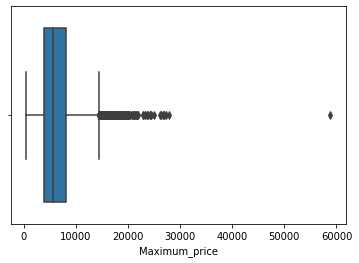

In [27]:
sns.boxplot(df['Maximum_price'])

In [28]:
df=df[df['Maximum_price']<30000]

C:\Users\91966\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Minimum_price'>

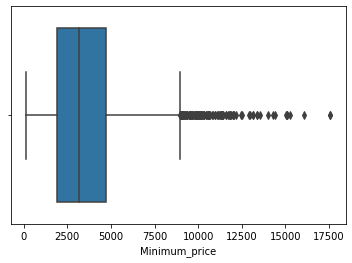

In [29]:
sns.boxplot(df['Minimum_price'])

In [30]:
df=df[df['Minimum_price']<15000]

In [31]:
df['Discount_avail']=df['Discount_avail'].fillna(0.143)

In [32]:
df.isnull().sum()

Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Discount_avail      0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [33]:
df['charges_1'].describe()

In [34]:
df=df.dropna()

In [35]:
df.isnull().sum()

Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Discount_avail      0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [36]:
df.head()

,Market_Category,Loyalty_customer,Product_Category,Grade,Discount_avail,Minimum_price,Maximum_price,Selling_Price
0,2,1,3,1,0.0,2983.0,4713.0,4185.947700
1,24,1,3,0,0.0,7495.0,10352.0,9271.490256
2,447,1,0,0,0.0,5752.0,7309.0,6785.701362
3,23,1,2,2,0.0,5090.0,20814.0,13028.917824
4,63,1,8,1,1.0,2430.0,9261.0,906.553935


In [37]:
df=df.astype(int)

In [38]:
X=df.drop('Selling_Price',axis=1)

In [39]:
y=df['Selling_Price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 0 to 6367
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Market_Category   5931 non-null   int32
 1   Loyalty_customer  5931 non-null   int32
 2   Product_Category  5931 non-null   int32
 3   Grade             5931 non-null   int32
 4   Discount_avail    5931 non-null   int32
 5   Minimum_price     5931 non-null   int32
 6   Maximum_price     5931 non-null   int32
 7   Selling_Price     5931 non-null   int32
dtypes: int32(8)
memory usage: 231.7 KB


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from  sklearn.linear_model import LinearRegression

In [44]:
log=LinearRegression()

In [45]:
X_train

,Market_Category,Loyalty_customer,Product_Category,Grade,Discount_avail,Minimum_price,Maximum_price
1239,447,1,2,0,1,1666,4693
4173,358,0,8,3,1,3072,10523
506,423,0,8,0,0,1864,4684
5144,452,0,1,0,0,2596,3776
4743,2,1,5,1,1,6765,13849
...,...,...,...,...,...,...,...
4038,115,0,8,0,0,1566,2247
5572,471,1,4,2,1,2317,3242
5612,11,0,0,3,0,309,1864
5782,452,1,9,0,0,3121,4233


In [46]:
log.fit(X_train,y_train)

LinearRegression()

In [47]:
prediction=log.predict(X_test)

In [48]:
X_test.head()

,Market_Category,Loyalty_customer,Product_Category,Grade,Discount_avail,Minimum_price,Maximum_price
1663,403,0,5,0,0,1713,4511
1649,462,1,7,3,0,1746,2978
3858,65,1,8,2,0,4953,6911
5476,469,1,2,0,0,6356,8650
3788,11,0,3,3,0,464,1021


In [49]:
y_test.head()

1663    3296
1649    2486
3858    6214
5476    7505
3788    1112
Name: Selling_Price, dtype: int32

In [50]:
from sklearn.metrics import classification_report

In [51]:
log.score(X, y)

0.9265414094081503

In [55]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train).values
X_test = sc.transform(X_test).val



In [58]:
X_train

array([[0.94904459, 1.        , 0.22222222, ..., 1.        , 0.10765467,
        0.15640156],
       [0.76008493, 0.        , 0.88888889, ..., 1.        , 0.20594198,
        0.36899683],
       [0.89808917, 0.        , 0.88888889, ..., 0.        , 0.12149598,
        0.15607337],
       ...,
       [0.02335456, 0.        , 0.        , ..., 0.        , 0.01279273,
        0.05323998],
       [0.9596603 , 1.        , 1.        , ..., 0.        , 0.20936735,
        0.13962732],
       [0.13800425, 1.        , 0.44444444, ..., 1.        , 0.05746243,
        0.10283339]])

In [57]:


import keras
from keras.models import Sequential
from keras.layers import Dense# Initialising the ANN
classifier = Sequential()# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))



# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])



# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
199/199 [==============================] - 0s 2ms/step - loss: -2153.2957 - accuracy: 0.0000e+00
Epoch 2/100
199/199 [==============================] - 0s 2ms/step - loss: -15065.7656 - accuracy: 0.0000e+00
Epoch 3/100
199/199 [==============================] - 0s 2ms/step - loss: -40538.1680 - accuracy: 0.0000e+00
Epoch 4/100
199/199 [==============================] - 0s 2ms/step - loss: -77700.8906 - accuracy: 0.0000e+00
Epoch 5/100
199/199 [==============================] - 0s 2ms/step - loss: -125845.8828 - accuracy: 0.0000e+00
Epoch 6/100
199/199 [==============================] - 0s 2ms/step - loss: -184074.6406 - accuracy: 0.0000e+00
Epoch 7/100
199/199 [==============================] - 0s 2ms/step - loss: -251850.6250 - accuracy: 0.0000e+00
Epoch 8/100
199/199 [==============================] - 0s 2ms/step - loss: -328526.4375 - accuracy: 0.0000e+00
Epoch 9/100
199/199 [==============================] - 0s 2ms/step - loss: -413737.5625 - accuracy: 0.0000e+00
Epoch 

KeyboardInterrupt: 

# ann
